In [2]:
import pandas as pd
import numpy as np



In [3]:
from IPython.display import display

# Create a new dataset
new_dataset = pd.DataFrame({
    'Name': ['John', 'Jane', 'Doe'],
    'Age': [28, 34, 45],
    'Birthday': ['1995-05-15', '1989-08-22', '1978-12-01']
})

# Print the dataset
# Display the dataset in a table
display(new_dataset)



,Name,Age,Birthday
0,John,28,1995-05-15
1,Jane,34,1989-08-22
2,Doe,45,1978-12-01


In [4]:
print(new_dataset)

   Name  Age    Birthday
0  John   28  1995-05-15
1  Jane   34  1989-08-22
2   Doe   45  1978-12-01


In [5]:
from datetime import datetime

# Calculate John's age
john_birthday = datetime.strptime('1978-12-01', '%Y-%m-%d')
current_date = datetime.now()
john_age = current_date.year - john_birthday.year - ((current_date.month, current_date.day) < (john_birthday.month, john_birthday.day))

print(f"John's age is {john_age}")

John's age is 46


In [6]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("amansingh0000000/smartphones")

print("Path to dataset files:", path)



/Users/admin/Documents/Projects/first_project/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/admin/Documents/Projects/first_project/.venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: /Users/admin/.cache/kagglehub/datasets/amansingh0000000/smartphones/versions/1


In [7]:
import pandas as pd
import os
import kagglehub


# Download latest version
data_path = kagglehub.dataset_download("amansingh0000000/smartphones")

smartphones_csv = os.path.join(data_path, "mobile_phones_2000.csv")
df = pd.read_csv(smartphones_csv)
df.head(10)




,Brand,Model,Price (USD),Selling Platform,Rating,Refresh Rate (Hz),Screen Size (inches),RAM (GB),Storage (GB),Processor,Camera Setup
0,OnePlus,Narzo Edge 16,1286.64,Best Buy,3.5,165,7.2,16,128,Snapdragon 8+ Gen 1,12MP + 16MP + 5MP
1,Sony,Pixel Max 24,728.52,eBay,4.6,90,6.1,4,64,Dimensity 920,48MP + 8MP + 5MP
2,Samsung,Reno Plus 23,1086.68,Official Store,3.4,60,6.2,12,64,Exynos 2200,200MP + 12MP + 8MP
3,Apple,Redmi Note Mini 16,1158.78,Official Store,3.5,120,7.1,6,128,A16 Bionic,50MP + 50MP + 2MP
4,Vivo,P Series Edge 13,1656.05,Reliance Digital,4.9,165,6.1,8,512,Helio G99,64MP + 50MP + 8MP
5,Vivo,P Series 5G 19,390.46,Best Buy,4.4,165,6.5,12,512,Dimensity 920,48MP + 50MP + 8MP
6,Sony,Galaxy S Ultra 22,1172.46,Best Buy,3.2,120,6.5,8,256,Dimensity 920,12MP + 8MP + 2MP
7,Apple,Reno Pro 20,1770.77,Amazon,3.3,165,5.5,8,1024,A16 Bionic,12MP + 12MP + 2MP
8,Nokia,Xperia Ultra 19,492.29,Amazon,3.7,90,7.4,4,256,Helio G99,12MP + 12MP + 2MP
9,Realme,P Series Mini 19,730.09,eBay,4.2,144,6.1,16,128,Dimensity 920,50MP + 12MP + 5MP


In [10]:
# Group by selling platform and calculate the count of entries for each platform
platform_grouped = df.groupby('Selling Platform').size().reset_index(name='Count').sort_values(by='Count', ascending=False)



# Display the grouped dataframe
platform_grouped

,Selling Platform,Count
6,Walmart,260
0,AliExpress,258
4,Official Store,256
3,Flipkart,251
1,Amazon,250
7,eBay,247
5,Reliance Digital,244
2,Best Buy,234


In [13]:
unique_platforms_count = df['Selling Platform'].nunique()
print(f"Number of unique selling platforms: {unique_platforms_count}")

Number of unique selling platforms: 8


Matplotlib is building the font cache; this may take a moment.


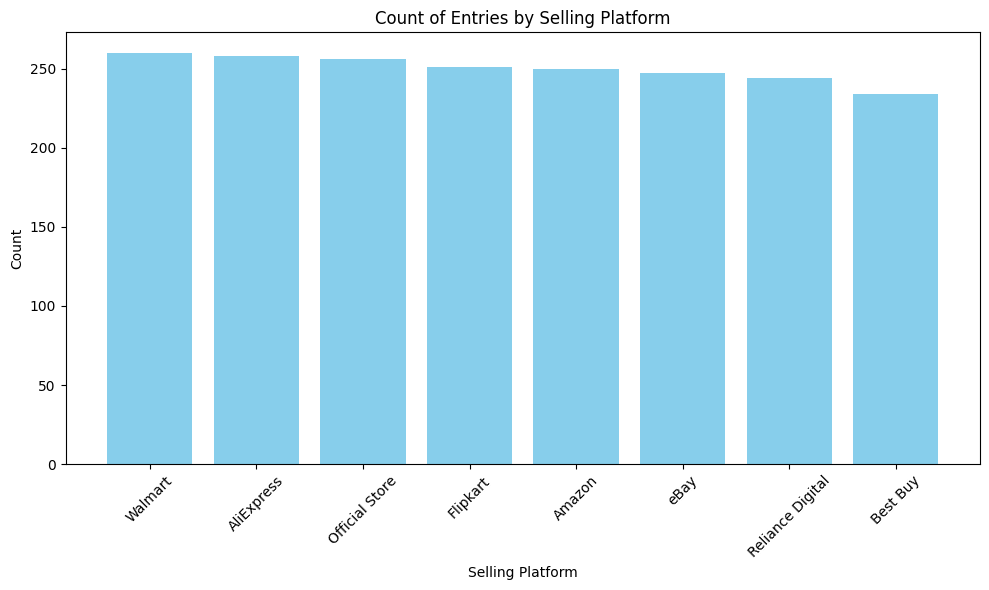

In [ ]:
import matplotlib.pyplot as plt

# Plot the bar graph
plt.figure(figsize=(10, 6))
plt.bar(platform_grouped['Selling Platform'], platform_grouped['Count'], color='skyblue')

# Add labels and title
plt.xlabel('Selling Platform')
plt.ylabel('Count')
plt.title('Count of Entries by Selling Platform')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()